# Visualizations for Class Imbalance

In this notebook I am creating a few plots with synthetic data to support my article on Medium about treating class imbalance

### Importing Libraries

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import random

In [3]:
data = {'x':[random.random() for _ in range(150)],
        'y':[random.random() for _ in range(150)]}

data = pd.DataFrame(data)

data['t'] = 1
data.loc[data['x']+data['y']<0.75, 't'] = 0

In [4]:
# making the data sparse for one class
to_drop = data[data['t']==0].sample(10).index.values
data = data.drop(to_drop)

In [7]:
random.seed(7)
data2 = {'x':[random.random() for _ in range(75)],
        'y':[random.random() for _ in range(75)]}

data2 = pd.DataFrame(data2)

data2['t'] = 1
data2.loc[data2['x']+data2['y']<0.75, 't'] = 0

In [9]:
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=7)
df = pd.DataFrame()
df[['x', 'y']], df['t'] = sm.fit_resample(data[['x','y']], data['t'])

# Visualize Class Weights

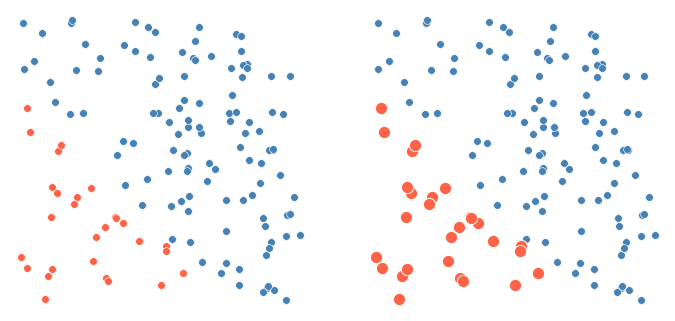

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.despine(top=True, right=True, left=True, bottom=True)
fig.subplots_adjust(hspace=5, wspace=0.125)


p=sns.scatterplot(data = data[data['t']==1], x='x', y='y', color='steelblue', ax=axes[0], s=60)
p=sns.scatterplot(data = data[data['t']==0], x='x', y='y', color='tomato', ax=axes[0], s=60)

q=sns.scatterplot(data = data[data['t']==1], x='x', y='y', color='steelblue', ax=axes[1], s=60)
q=sns.scatterplot(data = data[data['t']==0], x='x', y='y',color='tomato', ax=axes[1], s=150)
#q=sns.scatterplot(data = data[data['t']==0], x='x', y='y', color='tomato', ax=axes[1], s=60)


fig.tight_layout()
p.set_xlabel("", fontsize = 20)
p.set_ylabel("", fontsize = 20)
p.set_xticks([])
p.set_yticks([])

q.set_xlabel("", fontsize = 20)
q.set_ylabel("", fontsize = 20)
q.set_xticks([])
q.set_yticks([])

plt.show()

# Visualize Incorrect Understanding of SMOTE

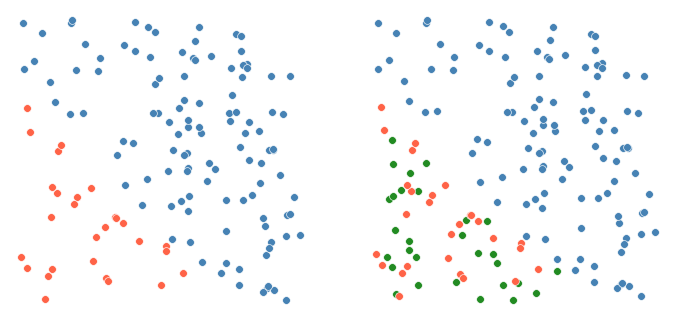

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.despine(top=True, right=True, left=True, bottom=True)
fig.subplots_adjust(hspace=5, wspace=0.125)


p=sns.scatterplot(data = data[data['t']==1], x='x', y='y', color='steelblue', ax=axes[0], s=60)
p=sns.scatterplot(data = data[data['t']==0], x='x', y='y', color='tomato', ax=axes[0], s=60)

q=sns.scatterplot(data = df[df['t']==1], x='x', y='y', color='steelblue', ax=axes[1], s=60)
q=sns.scatterplot(data = data2[data2['t']==0], x='x', y='y',color='forestgreen', ax=axes[1], s=60)
q=sns.scatterplot(data = data[data['t']==0], x='x', y='y', color='tomato', ax=axes[1], s=60)


fig.tight_layout()
p.set_xlabel("", fontsize = 20)
p.set_ylabel("", fontsize = 20)
p.set_xticks([])
p.set_yticks([])

q.set_xlabel("", fontsize = 20)
q.set_ylabel("", fontsize = 20)
q.set_xticks([])
q.set_yticks([])

plt.show()

# Visualize SMOTE

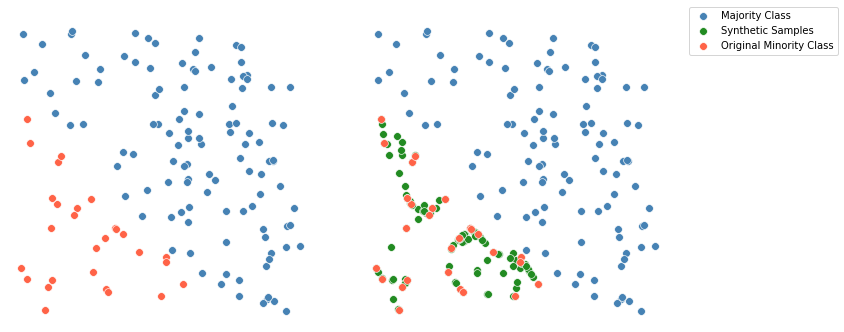

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.despine(top=True, right=True, left=True, bottom=True)
fig.subplots_adjust(hspace=5, wspace=0.125)


p=sns.scatterplot(data = data[data['t']==1], x='x', y='y', color='steelblue', ax=axes[0], s=60)
p=sns.scatterplot(data = data[data['t']==0], x='x', y='y', color='tomato', ax=axes[0], s=60)

q=sns.scatterplot(data = df[df['t']==1], x='x', y='y', label='Majority Class', color='steelblue', ax=axes[1], s=60)
q=sns.scatterplot(data = df[df['t']==0], x='x', y='y', label='Synthetic Samples',color='forestgreen', ax=axes[1], s=60)
q=sns.scatterplot(data = data[data['t']==0], x='x', y='y',label='Original Minority Class', color='tomato', ax=axes[1], s=60)


fig.tight_layout()
p.set_xlabel("", fontsize = 20)
p.set_ylabel("", fontsize = 20)
p.set_xticks([])
p.set_yticks([])

q.set_xlabel("", fontsize = 20)
q.set_ylabel("", fontsize = 20)
q.set_xticks([])
q.set_yticks([])

plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left')
plt.show()

# Visualize Undersample

In [13]:
rus = RandomUnderSampler(random_state=1)
dff = pd.DataFrame()
dff[['x','y']], dff['t'] = rus.fit_resample(data[['x','y']], data['t'])

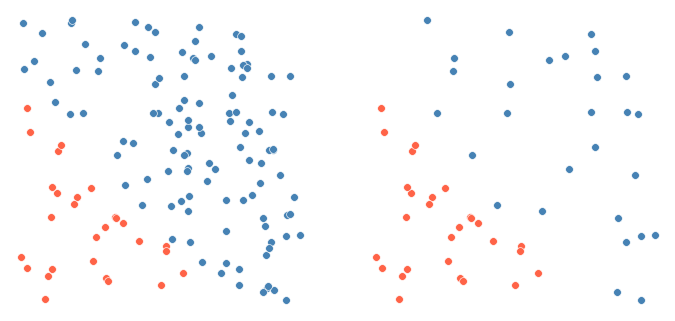

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
sns.despine(top=True, right=True, left=True, bottom=True)
fig.subplots_adjust(hspace=5, wspace=0.125)


p=sns.scatterplot(data = data[data['t']==1], x='x', y='y', color='steelblue', ax=axes[0], s=60)
p=sns.scatterplot(data = data[data['t']==0], x='x', y='y', color='tomato', ax=axes[0], s=60)

q=sns.scatterplot(data = dff[dff['t']==1], x='x', y='y', color='steelblue', ax=axes[1], s=60)
q=sns.scatterplot(data = dff[dff['t']==0], x='x', y='y', color='tomato', ax=axes[1], s=60)
#q=sns.scatterplot(data = data[data['t']==0], x='x', y='y',label='Original Minority Class', color='tomato', ax=axes[1], s=60)


fig.tight_layout()
p.set_xlabel("", fontsize = 20)
p.set_ylabel("", fontsize = 20)
p.set_xticks([])
p.set_yticks([])

q.set_xlabel("", fontsize = 20)
q.set_ylabel("", fontsize = 20)
q.set_xticks([])
q.set_yticks([])

plt.show()